# Business Understanding

## Project Domain

Domain: Kesehatan & Kebugaran (Health & Wellness) Proyek ini berada dalam domain kesehatan, khususnya dalam hal evaluasi komposisi tubuh manusia. Persentase lemak tubuh (body fat) merupakan indikator penting untuk mengetahui kondisi kesehatan seseorang dan dapat digunakan dalam program diet, kebugaran, serta pencegahan penyakit.

## Problem Statements

- Banyak orang tidak memiliki akses langsung untuk mengukur persentase lemak tubuh karena membutuhkan alat atau metode khusus seperti DEXA scan atau skinfold caliper.

- Terdapat kebutuhan akan metode alternatif berbasis data untuk memperkirakan tingkat lemak tubuh dengan akurasi yang memadai menggunakan pengukuran tubuh yang lebih mudah diperoleh (misalnya berat badan, tinggi, lingkar perut).

## Goals

- Membangun model prediksi yang dapat mengkategorikan persentase lemak tubuh ke dalam 3 kelas kesehatan tubuh, yaitu:
0. Lemak tubuh rendah

1. Lemak tubuh normal

2. Lemak tubuh tinggi

- Memahami faktor-faktor (fitur) apa saja yang paling memengaruhi nilai body fat (misalnya: abdomen, berat, tinggi).

- Memberikan solusi berbasis data untuk membantu personal trainer, tenaga medis, atau individu memperkirakan kondisi tubuh hanya dengan data antropometri dasar.

## Solution Statements

- Menggunakan dataset Body Fat Prediction dari Kaggle.

- Melakukan preprocessing seperti: normalisasi fitur, encoding label, dan pembagian data.

- Menggunakan model klasifikasi berbasis deep learning (neural network) untuk memprediksi kategori lemak tubuh (Akurasi_Badan).

- Mengevaluasi model menggunakan confusion matrix dan classification report untuk mengukur performa klasifikasi ke dalam 3 kategori tersebut.

# Data Understanding

## Import data dari kaggle

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nayasalsabilah","key":"5ba56f4ea63f56ebf7d58021e1790dff"}'}

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [4]:
!kaggle datasets download -d fedesoriano/body-fat-prediction-dataset

Dataset URL: https://www.kaggle.com/datasets/fedesoriano/body-fat-prediction-dataset
License(s): copyright-authors
  0% 0.00/7.43k [00:00<?, ?B/s]
100% 7.43k/7.43k [00:00<00:00, 29.5MB/s]


In [5]:
!mkdir body-fat-prediction-dataset
!unzip body-fat-prediction-dataset.zip -d body-fat-prediction-dataset
!ls body-fat-prediction-dataset

Archive:  body-fat-prediction-dataset.zip
  inflating: body-fat-prediction-dataset/bodyfat.csv  
bodyfat.csv


## Import Library yang dibutuhkan

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [7]:
df = pd.read_csv('/content/body-fat-prediction-dataset/bodyfat.csv')

In [13]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


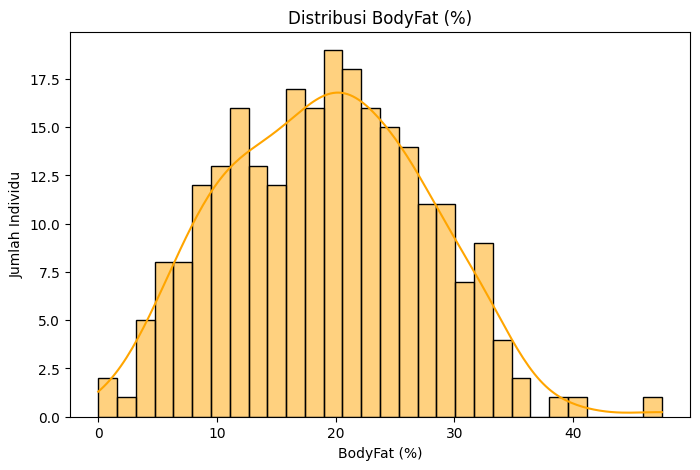

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df['BodyFat'], kde=True, bins=30, color='orange')
plt.title('Distribusi BodyFat (%)')
plt.xlabel('BodyFat (%)')
plt.ylabel('Jumlah Individu')
plt.show()

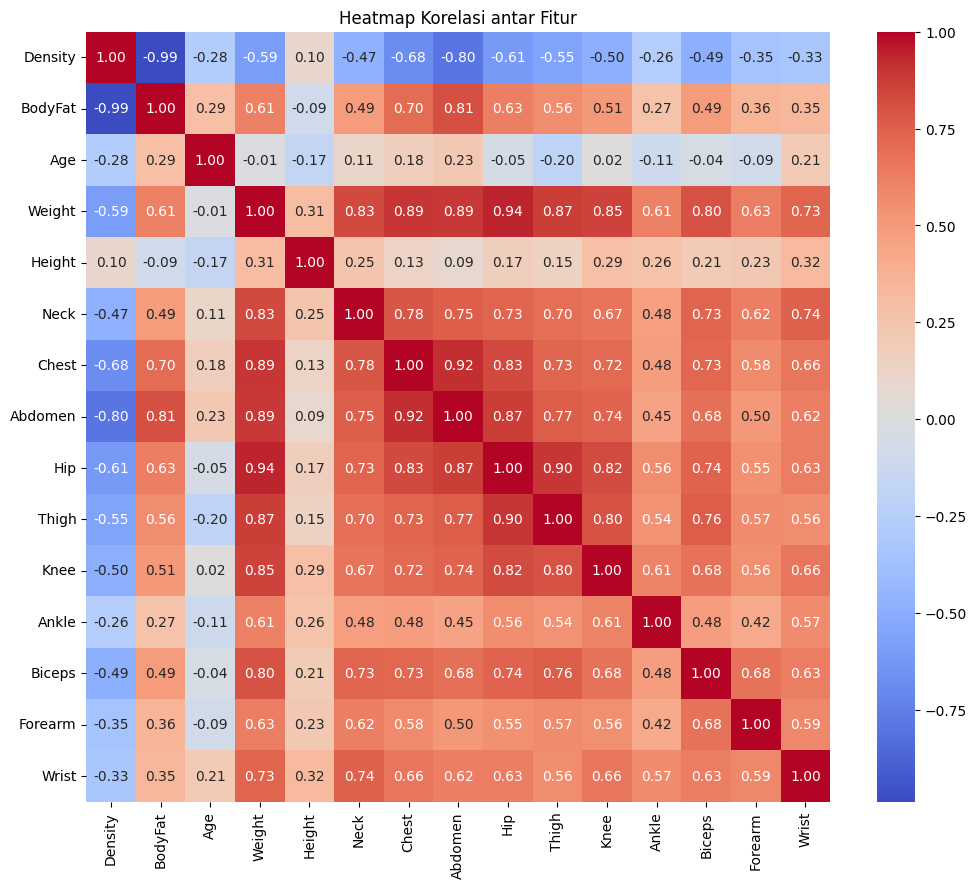

In [16]:
# Hitung korelasi antar fitur
corr = df.corr(numeric_only=True)

# Visualisasikan korelasi
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

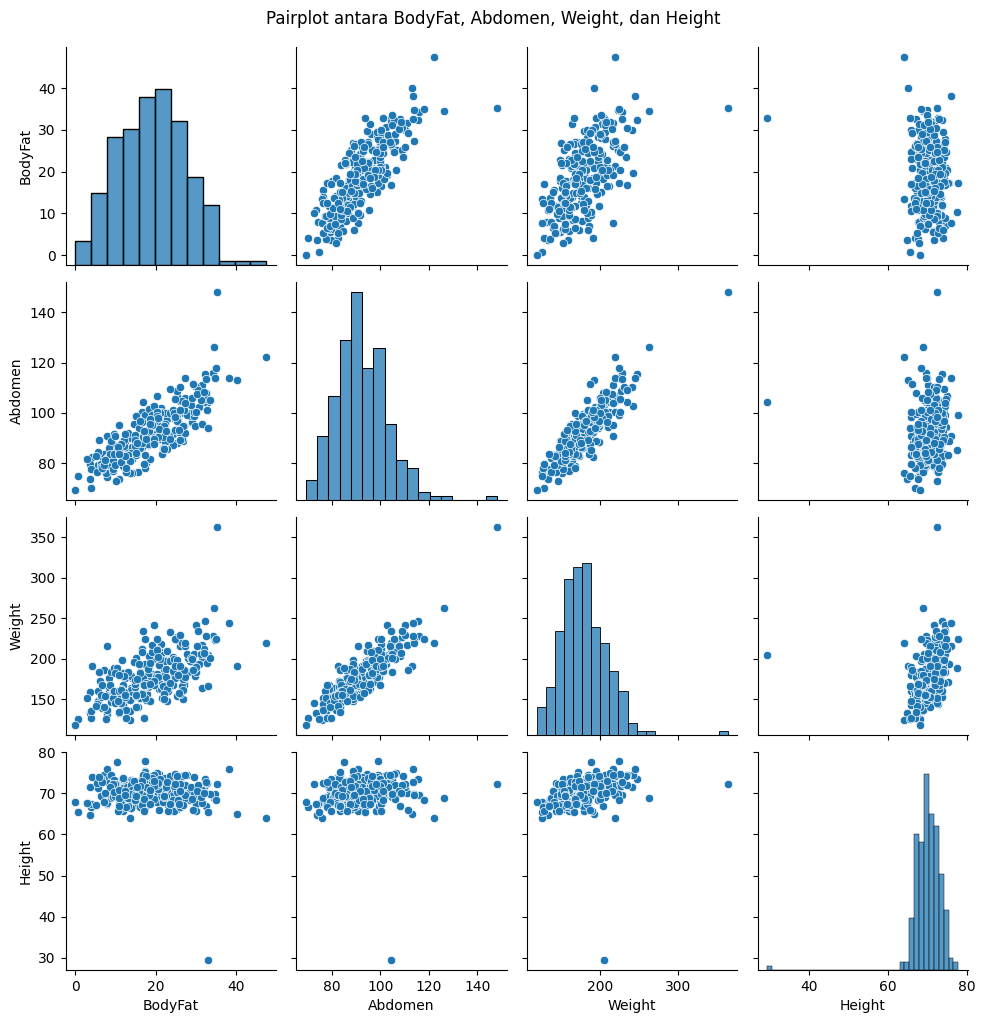

In [17]:
# Ambil subset fitur penting
subset = df[['BodyFat', 'Abdomen', 'Weight', 'Height']]

# Visualisasi hubungan antar fitur
sns.pairplot(subset)
plt.suptitle("Pairplot antara BodyFat, Abdomen, Weight, dan Height", y=1.02)
plt.show()

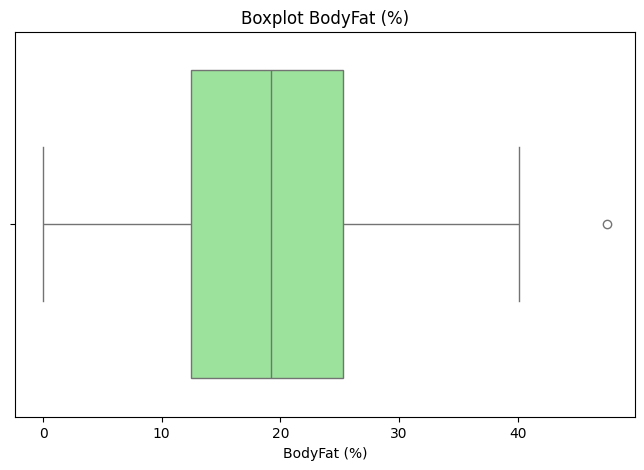

In [18]:
# Visualisasi outlier pada fitur BodyFat
plt.figure(figsize=(8,5))
sns.boxplot(x=df['BodyFat'], color='lightgreen')
plt.title('Boxplot BodyFat (%)')
plt.xlabel('BodyFat (%)')
plt.show()

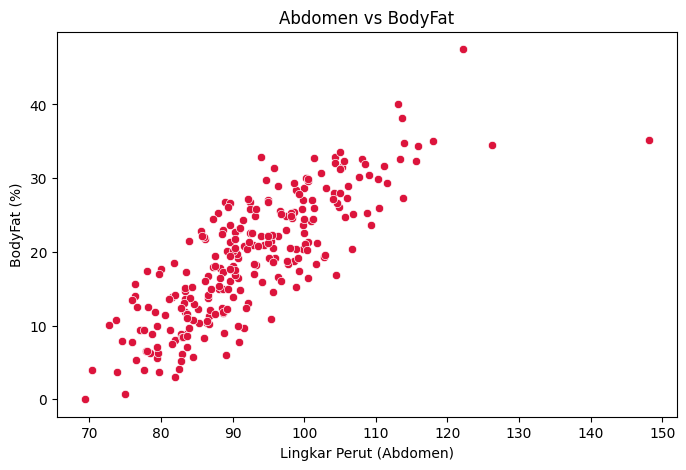

In [19]:
# Scatter plot Abdomen vs BodyFat
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='Abdomen', y='BodyFat', color='crimson')
plt.title('Abdomen vs BodyFat')
plt.xlabel('Lingkar Perut (Abdomen)')
plt.ylabel('BodyFat (%)')
plt.show()

# Data Preparation

In [20]:
def classify_bodyfat(x):
    if x < 10:
        return 0  # Rendah
    elif x <= 20:
        return 1  # Normal
    else:
        return 2  # Tinggi

# Tambahkan kolom baru
df['Akurasi_Lemak_Tubuh'] = df['BodyFat'].apply(classify_bodyfat)

# Cek distribusi label
print(df['Akurasi_Lemak_Tubuh'].value_counts())

Akurasi_Lemak_Tubuh
2    120
1     93
0     39
Name: count, dtype: int64


In [21]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Akurasi_Lemak_Tubuh
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,2
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,2


In [22]:
# pisahkan fitur dan target
X = df.drop(columns=["Akurasi_Lemak_Tubuh"])
y = df["Akurasi_Lemak_Tubuh"]

In [23]:
# Encode label target
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [24]:
# Normalisasi fitur
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Bagi data menjadi train dan test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y_encoded,
                                                    test_size=0.2,
                                                    random_state=42)

# Modeling

In [26]:
# Membangun model
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(len(le.classes_), activation="softmax")
])

In [27]:
# compile model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

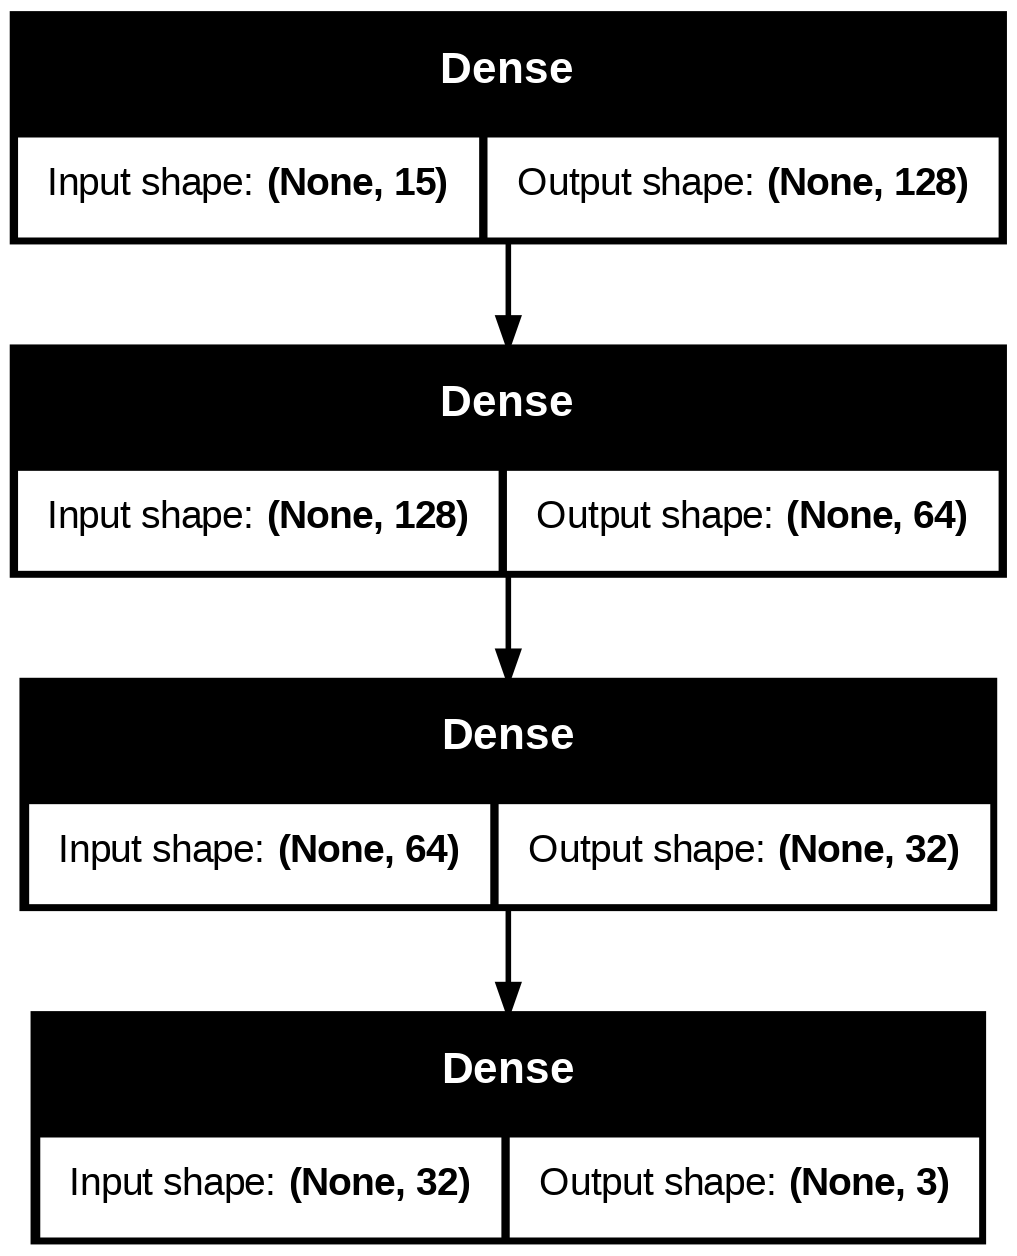

In [28]:
#plot arsitektur model
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [29]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.4262 - loss: 1.0497 - val_accuracy: 0.4118 - val_loss: 1.0011
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5178 - loss: 0.8745 - val_accuracy: 0.4510 - val_loss: 0.8987
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6759 - loss: 0.7854 - val_accuracy: 0.5490 - val_loss: 0.8262
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6893 - loss: 0.6941 - val_accuracy: 0.6275 - val_loss: 0.7273
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7316 - loss: 0.6289 - val_accuracy: 0.7059 - val_loss: 0.6801
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7505 - loss: 0.5522 - val_accuracy: 0.7843 - val_loss: 0.5974
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8354 - loss: 0.4711 - val_accuracy: 0.7255 - val_loss: 0.5193
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8395 - loss: 0.4079 - val_accuracy: 0.8039 - val_los

# Evaluation

In [30]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9295 - loss: 0.1171
Akurasi Model: 0.9412
Loss Model: 0.1131


In [31]:
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

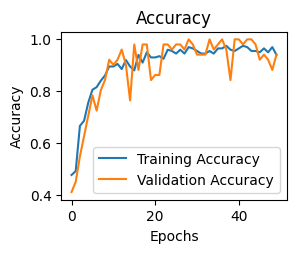

In [32]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()

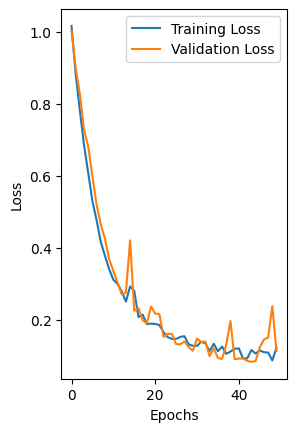

In [33]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


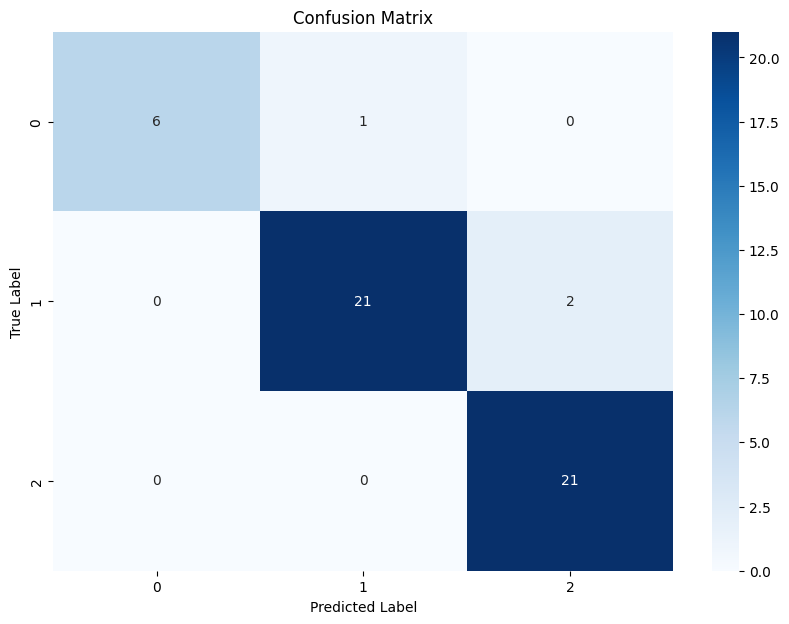

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.95      0.91      0.93        23
           2       0.91      1.00      0.95        21

    accuracy                           0.94        51
   macro avg       0.96      0.92      0.94        51
weighted avg       0.94      0.94      0.94        51



In [34]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Deployment

## Model Simulation

In [35]:
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Akurasi_Lemak_Tubuh
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,0
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,2
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,1
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,2


In [36]:
sample_input = np.array([[1.0708, 12.3, 23, 154.25, 67.75, 36.2, 93.1, 85.2, 94.5, 59.0, 37.3, 21.9, 32.0, 27.4, 17.1]])
sample_input_df = pd.DataFrame(sample_input)

In [37]:
sample_input_scaled = scaler.transform(sample_input_df)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [38]:
predicted_class = np.argmax(model.predict(sample_input_scaled))
predicted_crop = le.inverse_transform([predicted_class])

print(f"Akurasi Lemak Tubuh Anda: {predicted_crop[0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Akurasi Lemak Tubuh Anda: 1


## Save Model

In [39]:
# Konversi model ke TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Simpan model
with open('Akurasi_Lemak_Tubuh.tflite', 'wb') as f:
    f.write(tflite_model)

Saved artifact at '/tmp/tmpmhb76sjk'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 15), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  137887005644688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005645840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005644112: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005641616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005646416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005642960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005646800: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137887005645648: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [40]:
# Simpan label encoder dan scaler
import joblib
joblib.dump(le, 'label_encoder.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']